
<br>
-------------------------------------------------------------------------------<br>
Name:        manualPlotting<br>
Purpose:     Manual data analytics of generated results by automateSimulation script<br>
Author:      Marcus Vogt<br>
Created:     17.11.2021<br>
Copyright:   Chair of Sustainable Manufacturing and Life Cycle Engineering, Institute of Machine Tools and Production Technology, Technische UniversitÃ¤t Braunschweig, Langer Kamp 19b, 38106 Braunschweig, Germany<br>
Licence:     MIT (see License)<br>
-------------------------------------------------------------------------------<br>


In [5]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import helpers.helperFuncs as helperFuncs

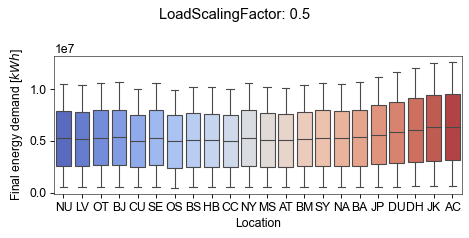

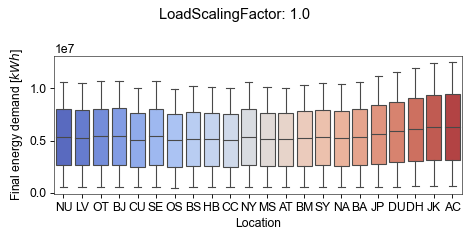

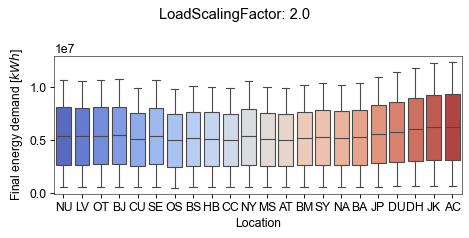

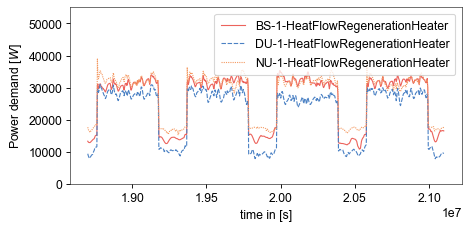

In [6]:
########### input declarations ############
createPublicationPlots = True
savePlots = True
withDynamic = False
current_dir = os.getcwd()
staticResultPath = os.path.join(current_dir, "data", "automateSimulationStaticResults.csv")
dynamicResultPath = os.path.join(current_dir, "data", "automateSimulationDynamicResults.csv")
dfStaticResults = pd.read_csv(staticResultPath, index_col=0)
# Todo: adapt this list for other values to be plotted over time from automateSimulationDynamicResults.csv
columnList2PlotDynamic = ["BS-1-HeatFlowRegenerationHeater", "DU-1-HeatFlowRegenerationHeater", "NU-1-HeatFlowRegenerationHeater"]
nrowsDynamicDataSet = 2.15 * 10**7
########### boxplot generation ############
if createPublicationPlots:
    import helpers.rc_parameters_matplotlib as rc_params
    plt.rcParams.update(rc_params.latex_largeColumn)
dfStaticResults = helperFuncs.extendStaticDF(dfStaticResults)
# get DataFrames per group of LoadScalingFactor
dfStaticResultsGrouped = dfStaticResults.groupby(by="LoadScalingFactor")
figDict = {}
for name, groupDF in dfStaticResultsGrouped:
    # order data set from cool to warm regions
    groupDF.sort_values(by=['OutsideDewPointTemperatureDegrees'], inplace=True, ascending=True) # "OutsideDewPointTemperatureDegrees" or "OutsideTemperatureDegrees"
    fig = plt.figure()
    sns.boxplot(x="location", y="finalEnergy", data=groupDF, palette="coolwarm") #y="electricEnergyKwh" or "finalEnergy"
    fig.suptitle(r"LoadScalingFactor: {}".format(name))
    plt.xlabel(r'Location')
    plt.ylabel(r'Final energy demand [$kWh$]') #r'Electric energy demand [$kWh$]' or r'Final energy demand [$kWh$]'
    plt.tight_layout()
    figDict[name] = fig

########### plotting of temporal results ############
if withDynamic:
    dfDynamicResults = pd.read_csv(dynamicResultPath, index_col=0, nrows=nrowsDynamicDataSet)
    fig2, ax2 = plt.subplots()
    ax2.set_xlabel("time in [s]")
    ax2.set_ylabel(r"Power demand [$W$]")
    ax2.set_ylabel(r"Power demand [$W$]")
    ax2.set_ylim(0, 55000)
    ax2 = sns.lineplot(data=dfDynamicResults[columnList2PlotDynamic][1.87 * 10**7:2.11 * 10**7], ax=ax2)
    ax2.legend(loc="upper right")
    plt.tight_layout()
    figDict["powerDemand"] = fig2
plt.show()
if savePlots:
    for name in figDict:
        nameWithoutPoint = str(name).replace(".", ",")
        helperFuncs.save_plot_to_file(file_name="LoadScaling{}EnergyDemandLocations".format(nameWithoutPoint),
                                      fig=figDict[name],
                                      savedir=os.path.join(current_dir, "images"))